In [2]:
!pip install mlxtend --upgrade

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 1.3 MB 4.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Mounted at /content/drive


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import numpy as np



In [15]:
#Main program. Some things below you may or may not want.


if __name__ == "__main__":

  #Transaction file name
  #trans_file_name = '/content/drive/MyDrive/CS Classes/CSC_373_Data_Mining/CSC_373_Student_Files/Data/GroceryStoreStacked.csv'
  #trans_file_name = '/content/drive/MyDrive/CS Classes/CSC_373_Data_Mining/CSC_373_Student_Files/Data/GroceryStoreStacked_sub.csv'
  #trans_file_name = '/content/drive/MyDrive/CS Classes/CSC_373_Data_Mining/CSC_373_Student_Files/Data/Table_5_1.txt'
  trans_file_name = '/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Association/Data/Copy of Assoc_Analysis_Vidhya.dat'
  print("Transaction file:", trans_file_name)
  #Set min_sup
  MIN_SUP = 0.2
  print("\nmin_sup",MIN_SUP)
  data_matrix = []

  #data_matrix = pd.read_csv(trans_file_name)

  with open(trans_file_name,'r') as data_file_ptr:
    for dat_item in data_file_ptr:
      
      dat_item = dat_item.strip('\n')
      dat_item_list = dat_item.split(",")
      dat_item_list.pop(0)

      data_matrix.append(dat_item_list)
    
    te = TransactionEncoder()
    te_ary = te.fit(data_matrix).transform(data_matrix)
    df = pd.DataFrame(te_ary, columns=te.columns_)


    frequent_itemsets = fpgrowth(df, min_support=MIN_SUP, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold= 0.2)
    display(frequent_itemsets)
    display(rules)




  



  
  #My overall code flow followed the algorithm. I did build in some efficiencies
  #  for candidate generation.



Transaction file: /content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Association/Data/Copy of Assoc_Analysis_Vidhya.dat

min_sup 0.2


,support,itemsets
0,0.504762,(Bread)
1,0.501587,(Cheese)
2,0.476190,(Meat)
3,0.438095,(Wine)
4,0.438095,(Eggs)
5,0.406349,(Diaper)
6,0.361905,(Pencil)
7,0.501587,(Milk)
8,0.425397,(Bagel)
9,0.238095,"(Bread, Cheese)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Cheese),0.504762,0.501587,0.238095,0.471698,0.940411,-0.015087,0.943424
1,(Cheese),(Bread),0.501587,0.504762,0.238095,0.474684,0.940411,-0.015087,0.942742
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
5,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
6,(Bread),(Meat),0.504762,0.476190,0.206349,0.408805,0.858491,-0.034014,0.886018
7,(Meat),(Bread),0.476190,0.504762,0.206349,0.433333,0.858491,-0.034014,0.873950
8,(Meat),(Milk),0.476190,0.501587,0.244444,0.513333,1.023418,0.005593,1.024136
9,(Milk),(Meat),0.501587,0.476190,0.244444,0.487342,1.023418,0.005593,1.021752


In [14]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.6) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
1,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667


In [21]:


#rules generation on my own datasets 
df1 = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Association/Data/data-2.csv')
df1.head()
df1 = df1[df1.Quantity >0]

df1[df1.Country == 'Germany'].head(10)


basket = pd.pivot_table(data=df1,index='InvoiceNo',columns='Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)






In [12]:
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [35]:
basket_sets = basket.applymap(convert_into_binary)

freq_item = fpgrowth(basket_sets, min_support=0.05, use_colnames=True)

display(freq_item)

,support,itemsets
0,0.112237,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.072259,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.056267,(JAM MAKING SET WITH JARS)
3,0.055920,(POSTAGE)
4,0.052195,(ALARM CLOCK BAKELIKE RED )
5,0.057608,(PAPER CHAIN KIT 50'S CHRISTMAS )
6,0.054629,(WOODEN PICTURE FRAME WHITE FINISH)
7,0.077672,(LUNCH BAG RED RETROSPOT)
8,0.065554,(PACK OF 72 RETROSPOT CAKE CASES)
9,0.060489,(JUMBO BAG PINK POLKADOT)


In [38]:
rules2 = association_rules(freq_item, metric="lift", min_threshold=1)



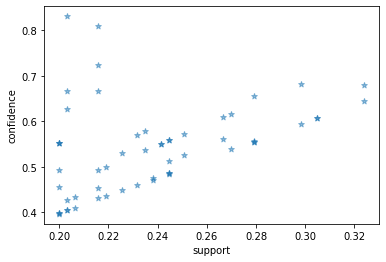

In [17]:
import matplotlib.pyplot as plt


support=rules[['support']].to_numpy()
confidence=rules[['confidence']].to_numpy()


plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()  




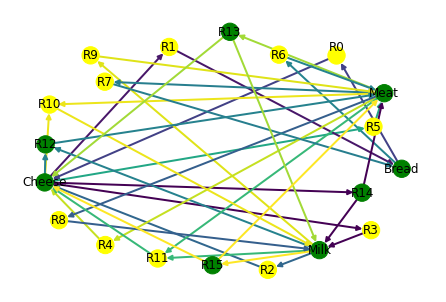

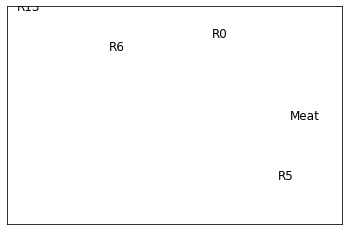

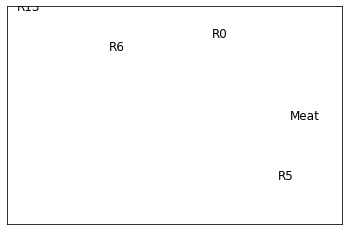

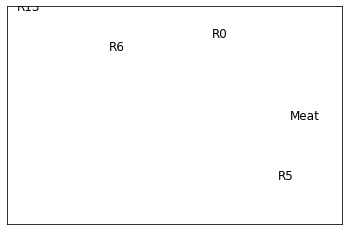

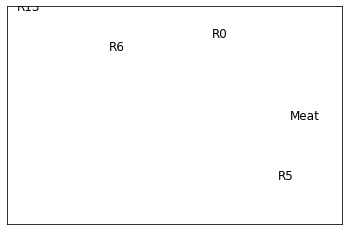

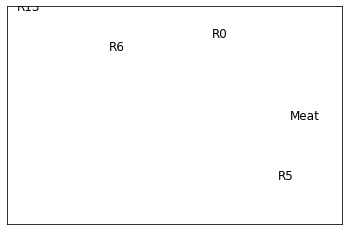

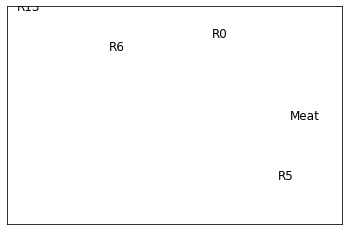

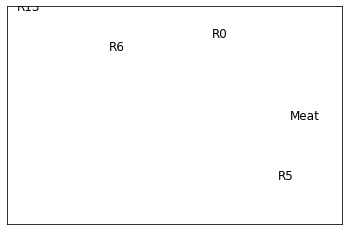

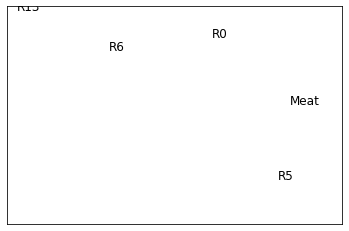

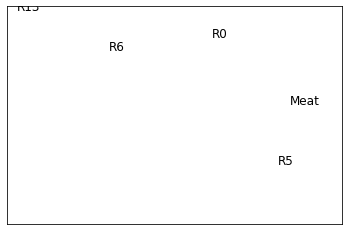

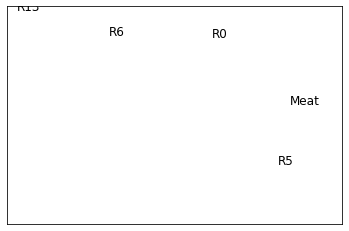

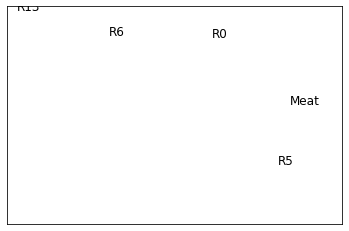

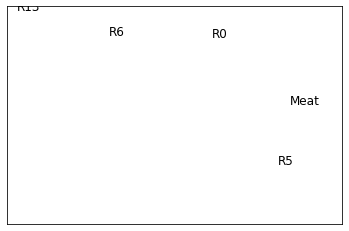

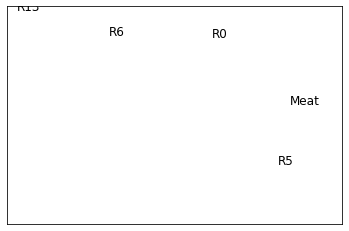

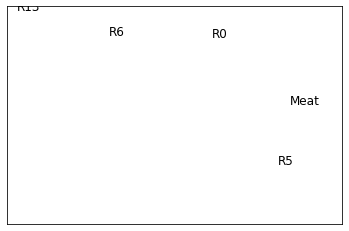

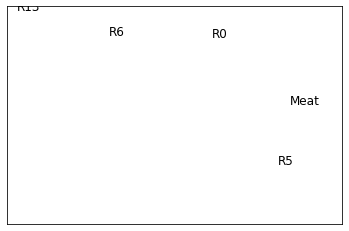

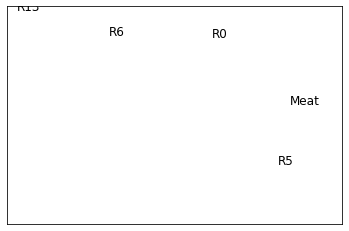

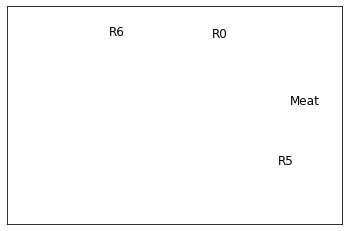

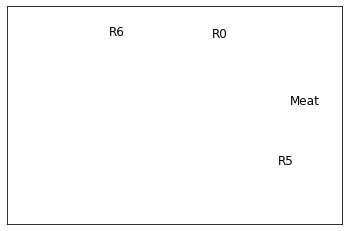

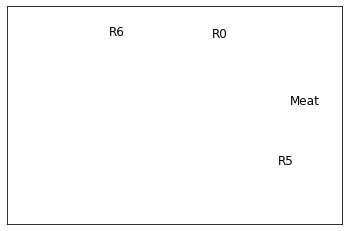

In [20]:

import networkx as nx
import matplotlib.pyplot as plt  
import numpy as np



def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos,node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()


draw_graph(rules, 16)